In [56]:
from contextlib import suppress
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common.handlers import csv_read
from common.visualizations import plot_stacked_bar

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
sns.set()

In [3]:
path = Path.home() / "Google Drive/DDMA Hackathon"
cluster_data_f = path / "clusters_netherlands_kmeans.csv"
data_set_f = path / "unscaled_hackaton_dataset.csv"

columns = {"id", "clusters"}
cluster_data = csv_read(cluster_data_f)
cluster_data = [{
    col: d[col]
    for col in columns
} for d in cluster_data]
columns = [col for col in next(csv_read(cluster_data_f)) if col not in columns]

data_set = csv_read(data_set_f)
data_set = [d for d in data_set]

In [38]:
columns = [
    "indexed_price",
    "build_year",
    "use_surface",
    "parcel_surface",
    "score_totaal_2018",
    "number_of_objects",
    "huishoudens_met_kinderen",
    "gemiddelde_huishoudensgrootte",
    "0_tot_15",
    "15_tot_25",
    "25_tot_45",
    "45_tot_65",
    "65_+",
    "omgevingsadressendichtheid",
    "koopwoningen",
    "migratieachtergrond",
    "elektriciteitsverbruik",
    "aardgasverbruik",
    "percentage_meergezinswoning",
    "oppervlakte_land",
    "personenautos_huishouden",
]
# columns = [
#     "aantal_inwoners",
#     "mannen",
#     "vrouwen",
#     "0_tot_15",
#     "15_tot_25",
#     "25_tot_45",
#     "45_tot_65",
#     "65_+",
#     "ongehuwd",
#     "gehuwd",
#     "gescheiden",
#     "migratieachtergrond",
#     "geboorte_relatief",
#     "sterfte_relatief",
#     "huishoudens",
#     "eenpersoonshuishoudens",
#     "huishoudens_zonder_kinderen",
#     "huishoudens_met_kinderen",
#     "gemiddelde_huishoudensgrootte",
#     "bevolkingsdichtheid",
#     "woningvoorraad",
#     "percentage_eengezinswoning",
#     "percentage_meergezinswoning",
#     "percentage_bewoond",
#     "percentage_onbewoond",
#     "koopwoningen",
#     "huurwoningen",
#     "elektriciteitsverbruik",
#     "aardgasverbruik",
#     "bedrijfsvestigingen",
#     "landbouw_bosbouw_visserij",
#     "nijverheid_energie",
#     "handel_horeca",
#     "vervoer_informatie_communicatie",
#     "financiële_diensten_onroerendgoed",
#     "zakelijke_dienstverlening",
#     "cultuur_recreatie_overige",
#     "personenautos",
#     "personenautos_brandstof",
#     "personenautos_overige_brandstof",
#     "personenautos_huishouden",
#     "personenautos_oppervlakte",
#     "motorfietsen",
#     "oppervlakte",
#     "oppervlakte_land",
#     "oppervlakte_water",
#     "stedelijkheid",
#     "omgevingsadressendichtheid",
#     "score_totaal_2018",
#     "score_woningen_2018",
#     "score_bewoners_2018",
#     "score_voorzieningen_2018",
#     "score_veiligheid_2018",
#     "score_omgeving_2018",
#     "score_totaal_2012",
#     "score_woningen_2012",
#     "score_bewoners_2012",
#     "score_voorzieningen_2012",
#     "score_veiligheid_2012",
#     "score_omgeving_2012",
#     "score_totaal_ontw",
#     "score_woningen_ontw",
#     "score_bewoners_ontw",
#     "score_voorzieningen_ontw",
#     "score_veiligheid_ontw",
#     "score_omgeving_ontw",
#     "amount",
#     "build_year",
#     "use_surface",
#     "parcel_surface",
#     "number_of_objects",
#     "indexed_price"
# ]

In [4]:
df = pd.merge(pd.DataFrame(data_set), pd.DataFrame(cluster_data), on="id")
colors = sorted(df["clusters"].unique())

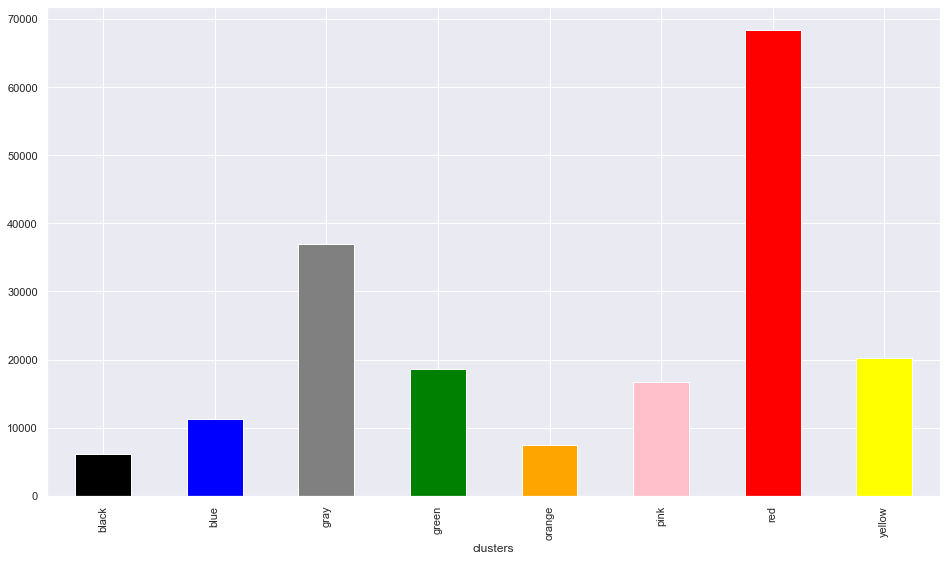

In [102]:
df_clusters = pd.DataFrame(df["clusters"])
df_clusters["count"] = 1
fig, ax = plt.subplots(figsize=(16, 9))
df_clusters.groupby("clusters").sum().plot.bar(ax=ax, color=[colors], legend=None);

In [96]:
for col in columns:
    try:
        df[col] = df[col].astype(float)
        bp = df.boxplot(column=col, by="clusters", showfliers=False, figsize=(16, 9), return_type="dict", patch_artist=True)
        for b, c in zip(bp[col]["boxes"], colors):
            b.set_color(c)
    except ValueError:
#         df_col = df.groupby("clusters")[col].value_counts()
#         df_col = pd.DataFrame(df_col).rename(columns={col: "count"}).reset_index().pivot(col, "clusters", "count")
#         plt.figure(figsize=(16, 9))
#         plot_stacked_bar(df_col.to_numpy(), series_labels=df_col.index, category_labels=df_col.columns.tolist())
        raise
    plt.savefig(f"plots/ml_variables/{col}.png")
    plt.close()

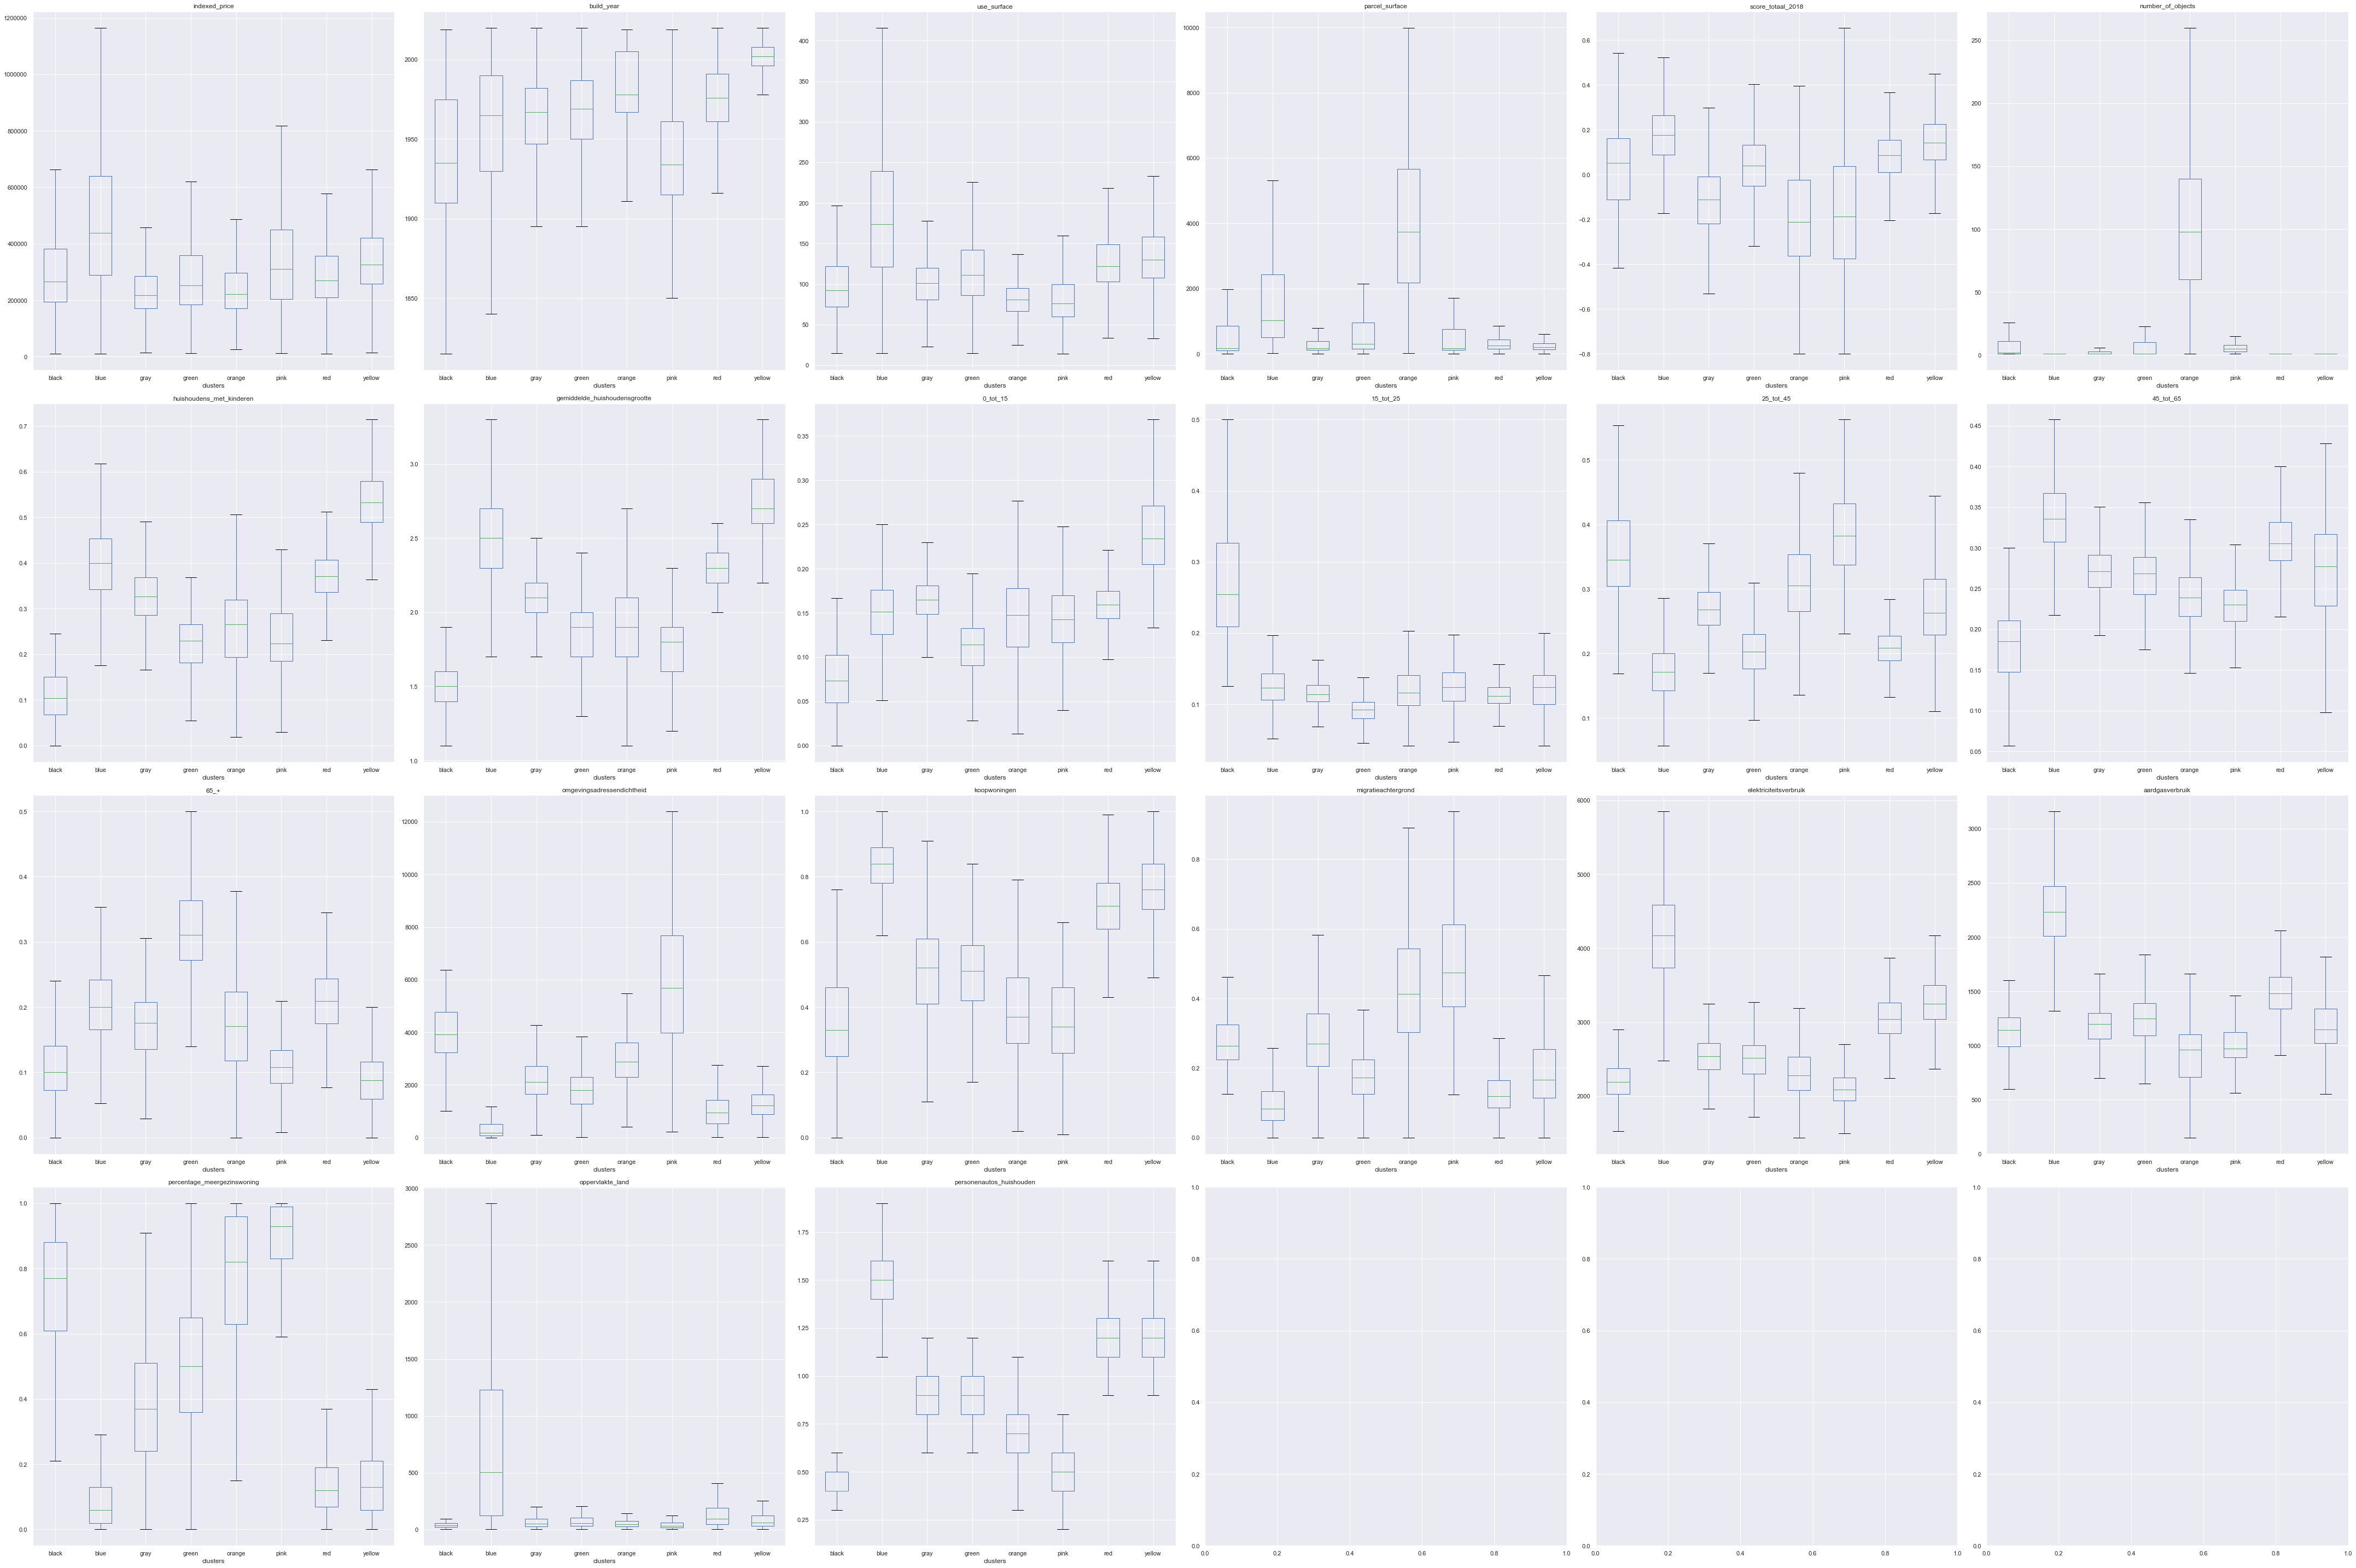

In [113]:
cols = iter(columns)
r, c = 4, 6
fig, ax = plt.subplots(r, c, figsize=(c * 10, r * 10))
with suppress(StopIteration):
    for i in range(r):
        for j in range(c):
            bp = df.boxplot(column=next(cols), by="clusters", showfliers=False, ax=ax[i, j])
plt.title("")
plt.suptitle("")
plt.tight_layout()
plt.savefig("plots/all.png")

In [21]:
clusters = {}
for cluster in df["clusters"].unique():
    df_cluster = df[df["clusters"] == cluster]
    clusters[cluster] = {}
    for col in columns:
        clusters[cluster][col] = df_cluster[col].describe().to_dict()
clusters

In [115]:
pink = df[df["clusters"] == "pink"]
pink

,gwb_code_10,gwb_code_8,regio,gm_naam,gwb_code,aantal_inwoners,mannen,vrouwen,0_tot_15,15_tot_25,25_tot_45,45_tot_65,65_+,ongehuwd,gehuwd,gescheiden,migratieachtergrond,geboorte_relatief,sterfte_relatief,huishoudens,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,percentage_eengezinswoning,percentage_meergezinswoning,percentage_bewoond,percentage_onbewoond,koopwoningen,huurwoningen,elektriciteitsverbruik,aardgasverbruik,bedrijfsvestigingen,landbouw_bosbouw_visserij,nijverheid_energie,handel_horeca,vervoer_informatie_communicatie,financiële_diensten_onroerendgoed,zakelijke_dienstverlening,cultuur_recreatie_overige,personenautos,personenautos_brandstof,personenautos_overige_brandstof,personenautos_huishouden,personenautos_oppervlakte,motorfietsen,oppervlakte,oppervlakte_land,oppervlakte_water,dekkingspercentage,stedelijkheid,omgevingsadressendichtheid,score_totaal_2018,score_woningen_2018,score_bewoners_2018,score_voorzieningen_2018,score_veiligheid_2018,score_omgeving_2018,score_totaal_2012,score_woningen_2012,score_bewoners_2012,score_voorzieningen_2012,score_veiligheid_2012,score_omgeving_2012,score_totaal_ontw,score_woningen_ontw,score_bewoners_ontw,score_voorzieningen_ontw,score_veiligheid_ontw,score_omgeving_ontw,postcode,house_number,house_number_ext,date,amount,build_year,build_type,use_surface,parcel_surface,energy_label,number_of_objects,buurt2019,gemeente2019,pc5,id,mun_code,buurt_code,indexed_price,indexed_date,clusters
548,00140300,140300,De Hoogte,Groningen,BU00140300,4025,0.5192546583850932,0.4795031055900621,0.137888,0.17764,0.449689,0.173913,0.059627,0.7776397515527951,0.1267080745341615,0.0782608695652174,0.361491,0.014,0.003,2515,0.6063618290258449,0.20079522862823063,0.190855,1.6,7289.0,2352,0.24,0.76,0.98,0.02,0.09,0.91,1880.0,970.0,240.0,0.0,35.0,45.0,35.0,5.0,60.0,60.0,1005,0.8407960199004975,0.16417910447761194,0.4,1823.0,75.0,57.0,55.0,2.0,1.0,1.0,4962.0,-0.294415,-0.0648569450923648,-0.0364830128812416,0.132689597376979,-0.193728864683732,-0.132035442136913,-0.257836610934307,-0.0646258027075454,-0.0441767952676266,0.162586152419137,-0.187001610884445,-0.12461855449388,-0.036578056482981014,-0.0002311423848194022,0.007693782386384997,-0.02989655504215799,-0.006727253799286986,-0.007416887643033013,9716KH,40,None,2019-10-15,235000,2012.0,Rijwoning hoek,122.0,78.0,A,1.0,00140300,14,9716K,10188,14,00140300,235000.000000,2019-Q3,pink
549,00140300,140300,De Hoogte,Groningen,BU00140300,4025,0.5192546583850932,0.4795031055900621,0.137888,0.17764,0.449689,0.173913,0.059627,0.7776397515527951,0.1267080745341615,0.0782608695652174,0.361491,0.014,0.003,2515,0.6063618290258449,0.20079522862823063,0.190855,1.6,7289.0,2352,0.24,0.76,0.98,0.02,0.09,0.91,1880.0,970.0,240.0,0.0,35.0,45.0,35.0,5.0,60.0,60.0,1005,0.8407960199004975,0.16417910447761194,0.4,1823.0,75.0,57.0,55.0,2.0,1.0,1.0,4962.0,-0.294415,-0.0648569450923648,-0.0364830128812416,0.132689597376979,-0.193728864683732,-0.132035442136913,-0.257836610934307,-0.0646258027075454,-0.0441767952676266,0.162586152419137,-0.187001610884445,-0.12461855449388,-0.036578056482981014,-0.0002311423848194022,0.007693782386384997,-0.02989655504215799,-0.006727253799286986,-0.007416887643033013,9716JJ,28,None,2019-10-14,200000,1930.0,Rijwoning tussen,86.0,88.0,D,1.0,00140300,14,9716J,11121,14,00140300,200000.000000,2019-Q3,pink
550,00140300,140300,De Hoogte,Groningen,BU00140300,4025,0.5192546583850932,0.4795031055900621,0.137888,0.17764,0.449689,0.173913,0.059627,0.7776397515527951,0.1267080745341615,0.0782608695652174,0.361491,0.014,0.003,2515,0.6063618290258449,0.20079522862823063,0.190855,1.6,7289.0,2352,0.24,0.76,0.98,0.02,0.09,0.91,1880.0,970.0,240.0,0.0,35.0,45.0,35.0,5.0,60.0,60.0,1005,0.8407960199004975,0.16417910447761194,0.4,1823.0,75.0,57.0,55.0,2.0,1.0,1.0,4962.0,-0.294415,-0.0648569450923648,-0.0364830128812416,0.132689597376979,-0.193728864683732,-0.132035442136913,-0.257